In [ ]:
### EDA project
# Ido Shirat
# ID: 201116175

## Import dataset and packeges

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
%matplotlib inline
import re
plt.style.use("ggplot")
df = pd.read_csv('Homicide_reports_dataset.csv')
df.Month= pd.to_datetime(df.Month,format='%B').dt.month
df['Perpetrator Age'] = pd.to_numeric(df['Perpetrator Age'], errors="coerce")
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,1,1,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Unknown,Male,15.0,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,3,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42.0,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,3,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,4,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42.0,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,4,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


df.

## Data Inspection

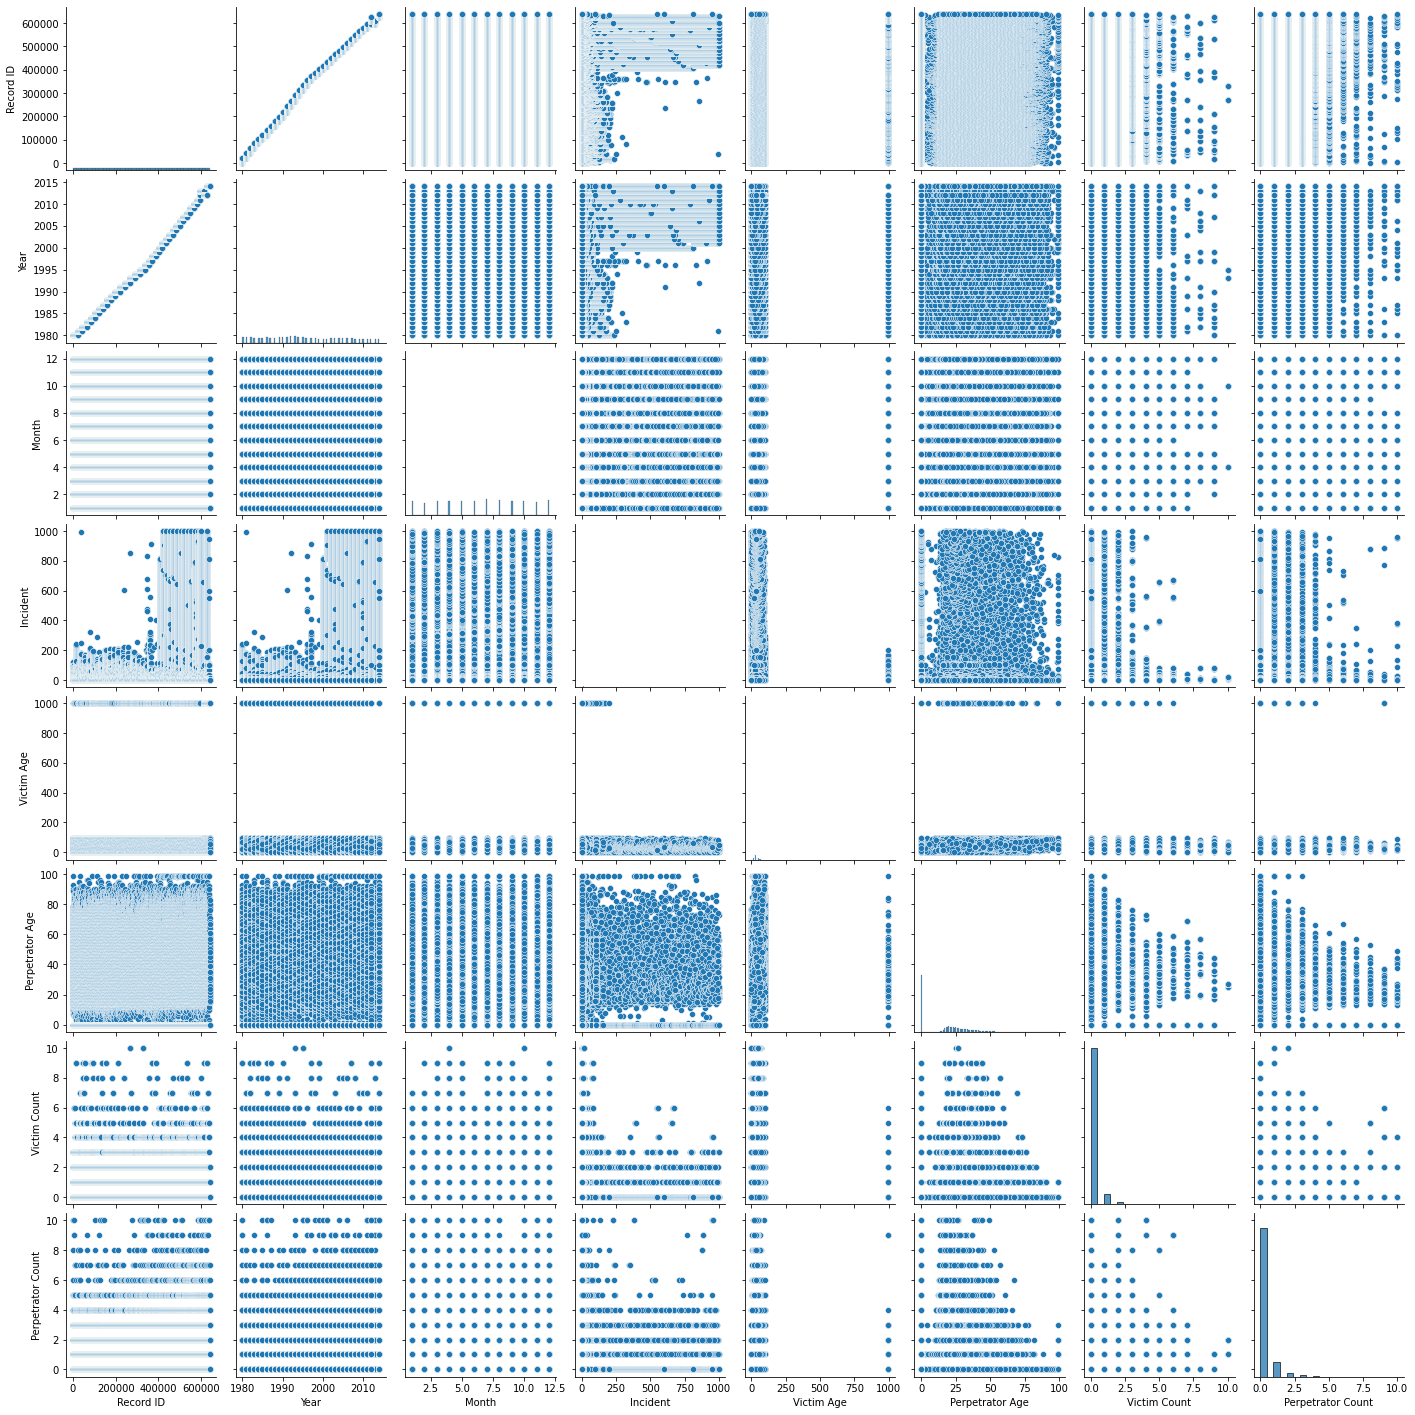

In [7]:
sns.pairplot(df)

In [ ]:
## data inspection and cleaining
r_dict={'Son':'Family','Brother':'Family','In-Law':'Family','Daughter':'Family','Father':'Family','Mother':'Family','Stepson':'Family','Stepfather':'Family','Sister':'Family','Stepdaughter':'Family','Stepmother':'Family',\
        'Wife':'Spouse','Husband':'Spouse','Girlfriend':'Spouse','Boyfriend':'Spouse','Common-Law Husband':'Spouse','Common-Law Wife':'Spouse','Ex-Wife':'Spouse','Boyfriend/Girlfriend':'Spouse','Ex-Husband':'Spouse',\
        'Stranger':'Acquaintance','Friend':'Acquaintance','Neighbor':'Acquaintance','Employee':'Acquaintance','Employer':'Acquaintance'}
df.Relationship.replace(r_dict, inplace=True)


df['Weapon_cat']=df.Weapon
Weapon_dict= {'Handgun':'Hot weapons','Knife':'Cold weapons','Blunt Object':'Cold weapons','Shotgun':'Hot weapons','Rifle':'Hot weapons',\
              'Firearm':'Hot weapons','Strangulation':'Cold weapons','Fire':'Cold weapons','Suffocation':'Hot weapons',\
              'Gun':'Hot weapons','Drowning':'Cold weapons','Drugs':'Cold weapons','Explosives':'Cold weapons' ,'Poison':'Cold weapons','Fall':'Cold weapons'}
df['Weapon_cat'].replace(Weavnpon_dict,inplace=True)

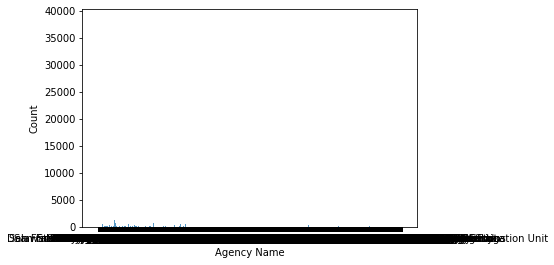

In [11]:
# for col in df.columns:
#   plt.figure(figsize=(10,8))
#   sns.scatterplot(df[col])
sns.histplot(df[df.columns[2]],bins= 30)

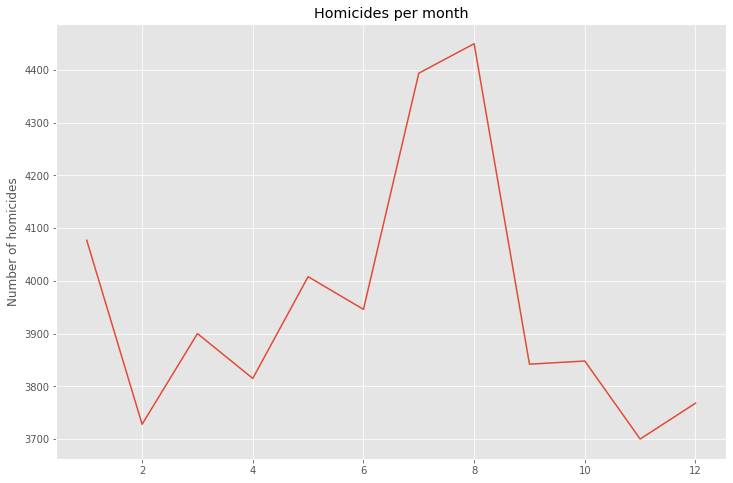

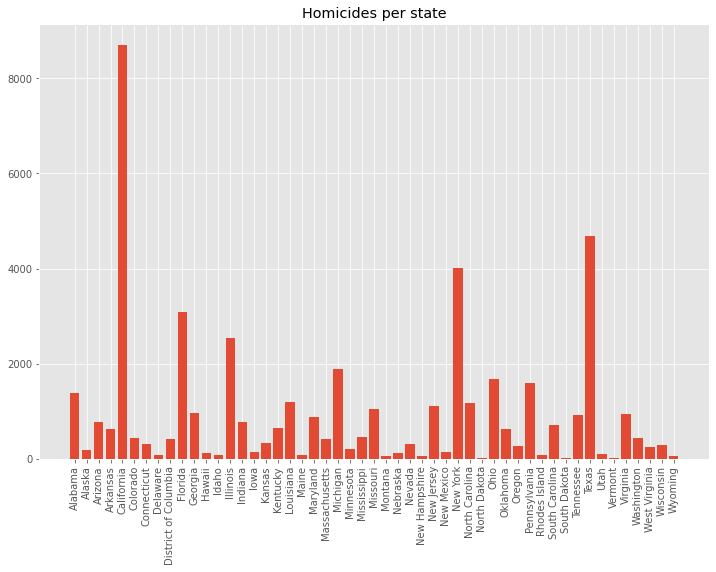

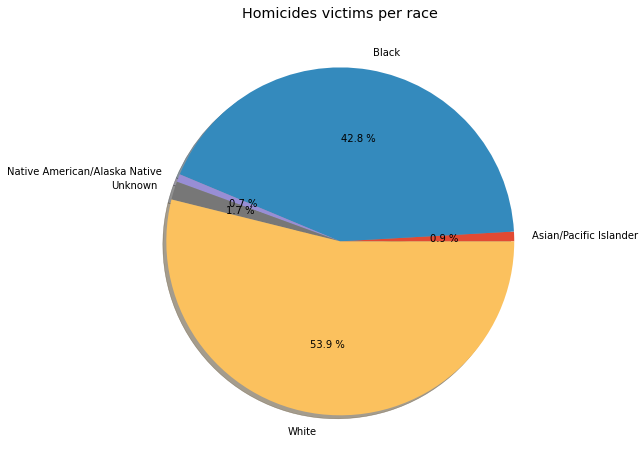

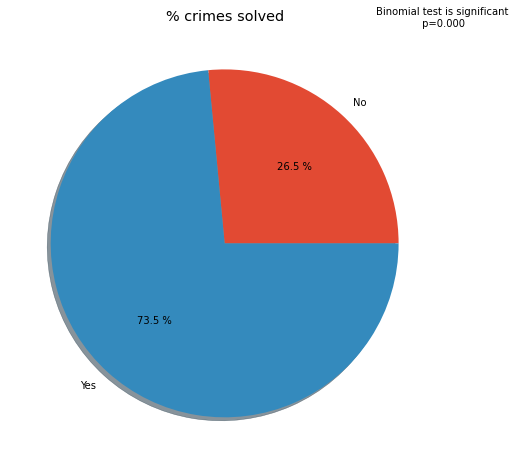

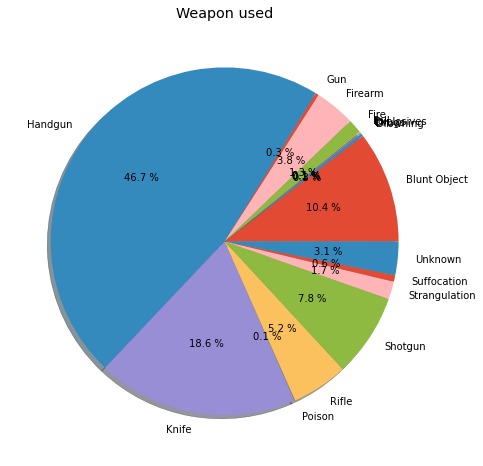

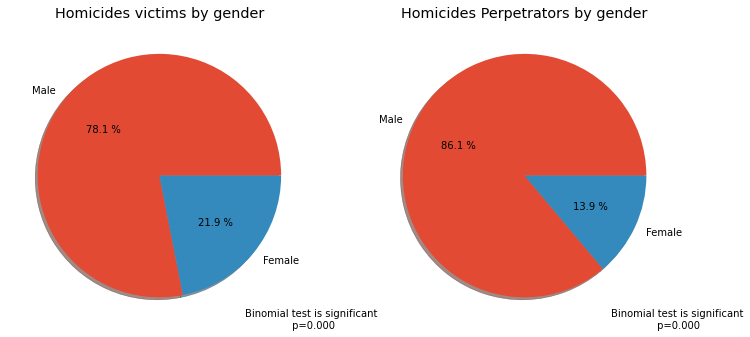

In [ ]:
### Generall
# Month

fig= plt.figure(figsize=(12,8))
ax= fig.gca()

ax.plot(df.groupby('Month')['Victim Sex'].count().sort_index().index,df.groupby('Month')['Victim Sex'].count())
ax.set_title('Homicides per month')
ax.set_ylabel('Number of homicides')
# ax.set_ylim([40000, 60000])

# state 
fig1= plt.figure(figsize=(12,8))
ax= fig1.gca()
ax.bar(df.groupby('State')['Victim Sex'].count().index,df.groupby('State')['Victim Sex'].count())
plt.xticks(rotation=90)
ax.set_title('Homicides per state')

# Race
fig2= plt.figure(figsize=(12,8))
ax= fig2.gca()
ax.pie(df.groupby('Victim Race')['Victim Sex'].count(),labels=df.groupby('Victim Race')['Victim Sex'].count().index,autopct='%.1f %%', shadow=True)
ax.set_title('Homicides victims per race')

# crimed solved
fig3= plt.figure(figsize=(12,8))
ax= fig3.gca()
ax.pie(df.groupby('Crime Solved')['Victim Sex'].count()/len(df),labels=df.groupby('Crime Solved')['Victim Sex'].count().index,autopct='%.1f %%', shadow=True)
ax.set_title('% crimes solved')
p= stats.binom_test(df.groupby('Crime Solved')['Victim Sex'].count().loc['Yes'], n=len(df), p=0.5)
if p<0.05:
    __, top =plt.ylim()
    __, right =plt.xlim()
    plt.text(right,top,f'Binomial test is significant\n p={p:.3f}', fontsize=10, ha='center')

#Weapon
fig4= plt.figure(figsize=(12,8))
ax= fig4.gca()
ax.pie(df.groupby('Weapon')['Victim Sex'].count()/len(df),labels=df.groupby('Weapon')['Victim Sex'].count().index,autopct='%.1f %%', shadow=True)
ax.set_title('Weapon used')

# Sex
fig5= plt.figure(figsize=(12,8))
ax= fig5.add_subplot(1, 2, 1)
y=df.groupby('Victim Sex')['Record ID'].count().loc[['Male','Female']]
ax.pie(y/y.sum(),labels=y.index,autopct='%.1f %%', shadow=True)
ax.set_title('Homicides victims by gender')
p= stats.binom_test(y.loc['Male'], n=y.sum(), p=0.5)
if p<0.05:
    bottom, top =plt.ylim()
    __, right =plt.xlim()
    plt.text(right,bottom,f'Binomial test is significant\n p={p:.3f}', fontsize=10, ha='center')
ax1 = fig5.add_subplot(1, 2, 2)
y1=df.groupby('Perpetrator Sex')['Record ID'].count().loc[['Male','Female']]

ax1.pie(y1/y1.sum(),labels=y1.index,autopct='%.1f %%', shadow=True)
ax1.set_title('Homicides Perpetrators by gender')

p= stats.binom_test(y1.loc['Male'], n=y1.sum(), p=0.5)
if p<0.05:
    bottom, top =plt.ylim()
    __, right =plt.xlim()
    plt.text(right,bottom,f'Binomial test is significant\n p={p:.3f}', fontsize=10, ha='center')
  


Text(0.49499853816340883, 87.35, 't-test  is significant p=0.000')

<Figure size 432x288 with 0 Axes>

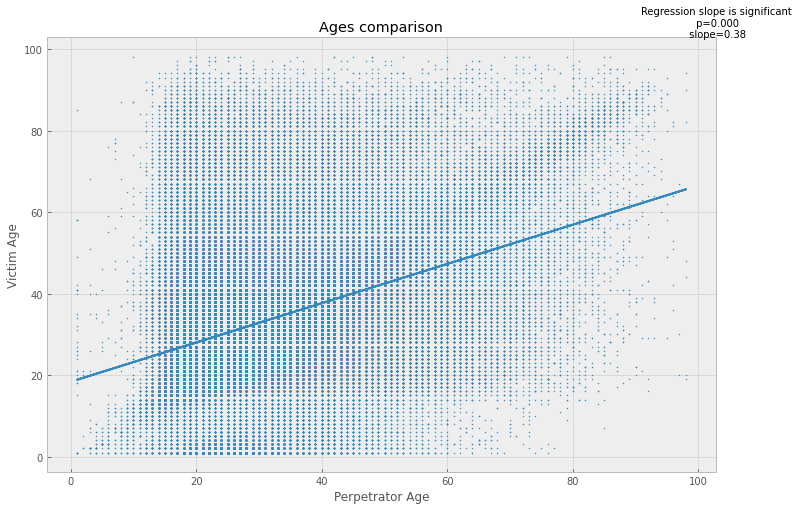

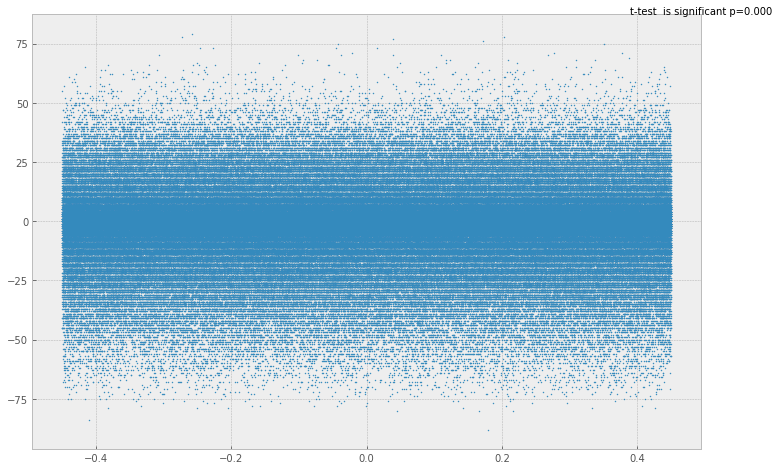

In [ ]:
df_ages=df[(df['Victim Age']>0)&(df['Victim Age']<99)&(df['Perpetrator Age']>0)&(df['Perpetrator Age']<99)]



fig= plt.figure()

fig= plt.figure(figsize=(12,8))
ax=fig.gca()
ax.scatter(df_ages['Perpetrator Age'],df_ages['Victim Age'],s=0.9)
slope, intercept, r_value, p_value, std_err = stats.linregress(df_ages['Perpetrator Age'], df_ages['Victim Age'])

if p_value<0.05:
    __, top =plt.ylim()
    __, right =plt.xlim()
    plt.text(right,top,f'Regression slope is significant\n p={p_value:.3f}\n slope={r_value:.2f}', fontsize=10, ha='center')
    plt.plot(df_ages['Perpetrator Age'],intercept+df_ages['Perpetrator Age']*slope)
ax.set_title('Ages comparison')
ax.set_ylabel('Victim Age')
ax.set_xlabel('Perpetrator Age')


fig1= plt.figure(figsize=(12,8))
ax=fig1.gca()
w= 0.9
ages_gap= df_ages['Perpetrator Age']-df_ages['Victim Age']
# ax.scatter(df_ages['Perpetrator Age'],df_ages['Victim Age'],s=0.4)

    # distribute scatter randomly across whole width of bar
# y_np=np.array(ages_gap)
ax.scatter(np.random.random(np.array(ages_gap).size) * w - w / 2, ages_gap ,s= 0.9)
t,p=stats.ttest_1samp(ages_gap, popmean=0)
__, top =plt.ylim()
__, right =plt.xlim()
plt.text(right,top,f't-test  is significant p={p:.3f}', fontsize=10, ha='center')


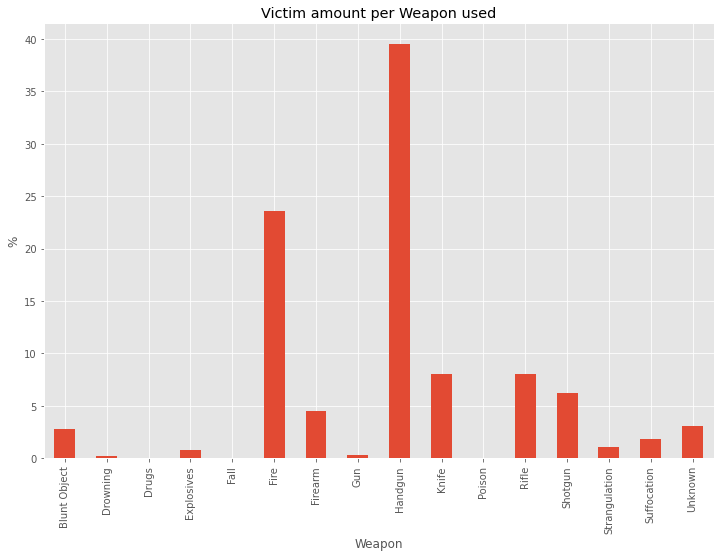

In [ ]:
pd.Series(100*df.groupby('Weapon')['Victim Count'].sum()/df['Victim Count'].sum()).plot.bar(figsize=(12,8),title='Victim amount per Weapon used',ylabel='%')



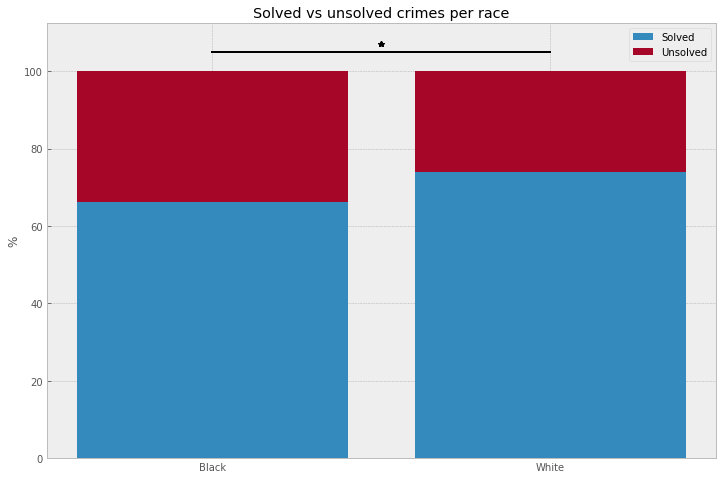

In [ ]:
a=df.pivot_table(index='Victim Race',columns='Crime Solved',values= 'Record ID',aggfunc='count')#.plot.bar() 
a1= a.div(a.sum(axis=1),axis=0)*100
a1= a1.loc[['Black','White']]

plt.style.use("bmh")
fig = plt.figure(figsize=(12,8))
ax = fig.gca()
ax.bar(x=list(range(2)), height=a1['Yes'],
       align='center', # color='g',
       tick_label=a1.index)
ax.bar(x=list(range(2)), height=a1['No'],
       # Height to start drawing the stacked bar from 
       bottom=a1['Yes'], 
       align='center', # color='r'
       )
ax.legend(['Solved', 'Unsolved'], loc='best')
ax.set_title('Solved vs unsolved crimes per race')
ax.set_ylabel('%')
p= stats.binom_test(a1.loc['Black','Yes'], n=a.loc['Black'].sum(), p=a1.loc['White','Yes']/100)
if p<0.05:
    x1, y1 = [0, 1], [100+5, 100+5]
    plt.plot(x1, y1, marker = '',color='k')
    plt.plot([0.5,0.5, 0.5, 0.5], [100+7,100+7, 100+7, 100+7], linewidth=1, color='k', marker= '*')



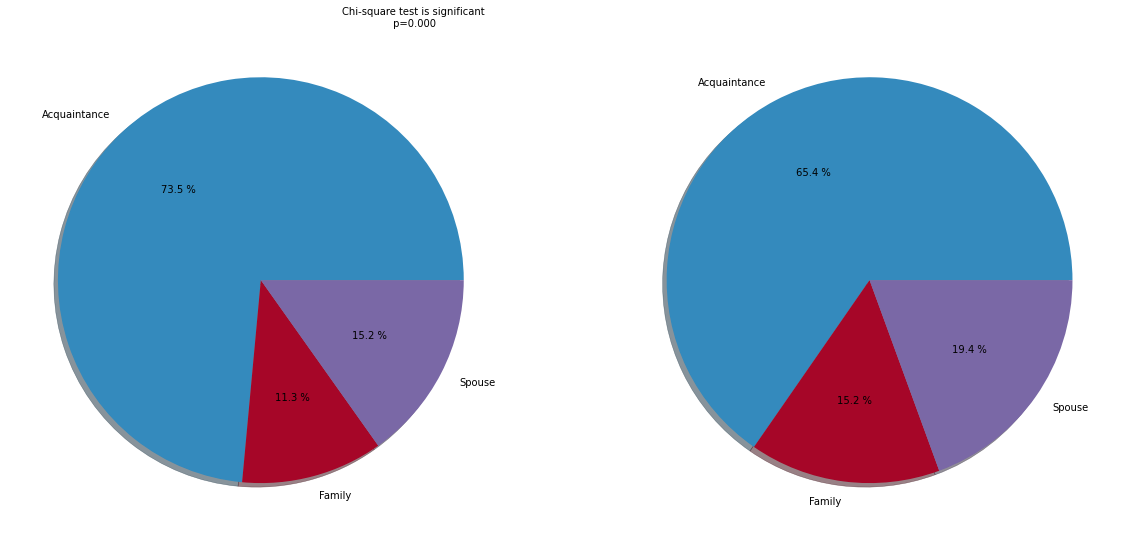

In [ ]:

df1 = df[(df['Victim Race']=='Black') | (df['Victim Race']=='White')]
df1=df1[(df1['Relationship']!='Unknown')]
race_relat= df1.pivot_table(index='Victim Race',columns='Relationship', values= 'Record ID', aggfunc='count')

__,p= stats.chisquare(race_relat.loc['Black'],race_relat.loc['White'])

fig5= plt.figure(figsize=(20,11))
ax= fig5.add_subplot(1, 2, 1)
y=race_relat.loc['Black']
ax.pie(y/y.sum(),labels=y.index,autopct='%.1f %%', shadow=True)

ax1 = fig5.add_subplot(1, 2, 2)
y1=race_relat.loc['White']
ax1.pie(y1/y1.sum(),labels=y1.index,autopct='%.1f %%', shadow=True)
if p<0.05:
    __, top =plt.ylim()
    left, right =plt.xlim()
    plt.text(left-1,top,f'Chi-square test is significant\n p={p:.3f}', fontsize=10, ha='center')




Text(0.5, 0, 'Victim Count')

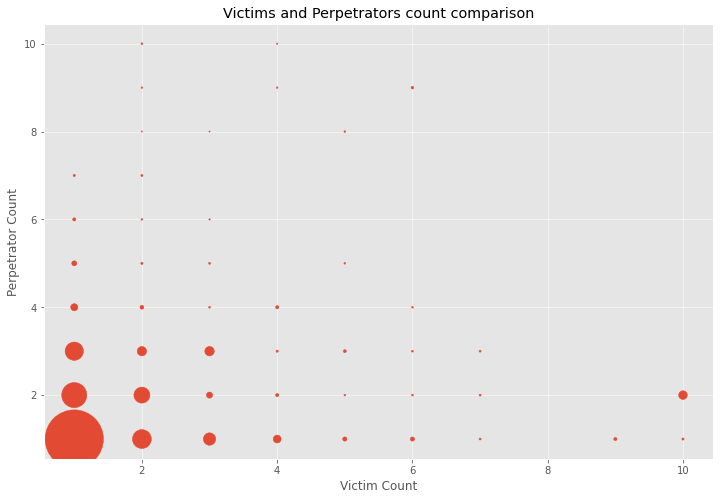

In [ ]:
plt.style.use("ggplot")
df_count= df[(df['Victim Count']>0)& (df['Perpetrator Count']>0)]
a=df_count.groupby(['Victim Count','Perpetrator Count'],as_index=False)['Record ID'].count()

fig= plt.figure(figsize=(12,8))
ax=fig.gca()
ax.scatter(a['Victim Count'],a['Perpetrator Count'],s=a['Record ID']/2)

ax.set_title('Victims and Perpetrators count comparison')
ax.set_ylabel('Perpetrator Count')
ax.set_xlabel('Victim Count')

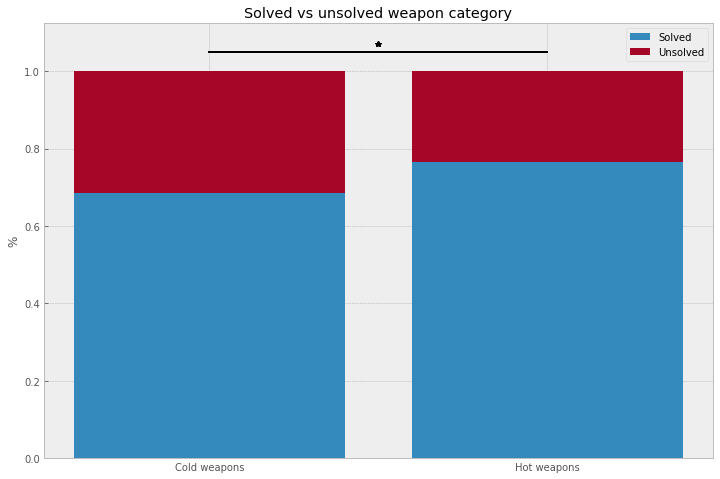

In [ ]:


wc_pt= df.groupby(['Weapon_cat','Crime Solved'])['Record ID'].count()#.plot.bar()
wc_pt=wc_pt.loc[['Cold weapons','Hot weapons']]
cold = wc_pt.loc['Cold weapons']/wc_pt.loc['Cold weapons'].sum()
hot = wc_pt.loc['Hot weapons']/wc_pt.loc['Hot weapons'].sum()


plt.style.use("bmh")
fig = plt.figure(figsize=(12,8))
ax = fig.gca()
ax.bar(x=list(range(2)), height=[hot['Yes'],cold['Yes']],
       align='center', # color='g',
       tick_label=['Cold weapons','Hot weapons'])
ax.bar(x=list(range(2)), height=[hot['No'],cold['No']],
       # Height to start drawing the stacked bar from 
       bottom=[hot['Yes'],cold['Yes']], 
       align='center', # color='r'
       )
ax.legend(['Solved', 'Unsolved'], loc='best')
ax.set_title('Solved vs unsolved weapon category')
ax.set_ylabel('%')
p= stats.binom_test(wc_pt.loc['Cold weapons','Yes'], n=wc_pt.loc['Cold weapons'].sum(), p=hot.loc['Yes']/100)
if p<0.05:
    x1, y1 = [0, 1], [1+0.05, 1+0.05]
    plt.plot(x1, y1, marker = '',color='k')
    plt.plot([0.5,0.5, 0.5, 0.5], [1+0.07,1+0.07, 1+0.07, 1+0.07], linewidth=1, color='k', marker= '*')



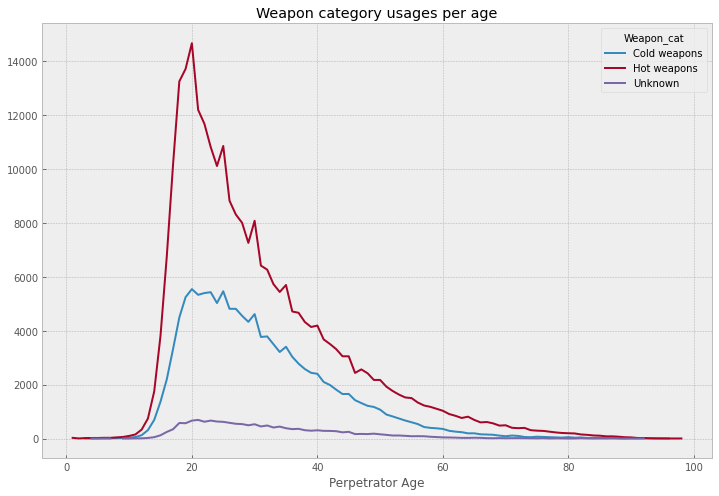

In [ ]:
df_ages.pivot_table(index='Perpetrator Age',columns= 'Weapon_cat',values='Record ID', aggfunc='count').plot(figsize=(12,8),title='Weapon category usages per age')

In [ ]:
cold

Crime Solved
No     0.276673
Yes    0.723327
Name: Record ID, dtype: float64

In [ ]:
df.head()

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source,Weapon_cat
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,1,1,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0.0,0.0,FBI,Cold weapons
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,3,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0.0,0.0,FBI,Cold weapons
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,3,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0.0,0.0,FBI,Unknown
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,4,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0.0,0.0,FBI,Cold weapons
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,4,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0.0,1.0,FBI,Unknown
